SEMESTER END PROJECT: INVENTORY OPTIMIZATION USING MACHINE LEARNING

In [1]:
#loading the dataset using pandas 
import pandas as pd
data = pd.read_csv(r'C:\Users\Gul Sher\OneDrive\Documents\Business_Data_Analysis_Sem_4\retail_store_inventory.csv')

In [2]:
#BASIC EDA (Exploratory Data Analytics)
#1. Display the first few rows of the dataset
data.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [3]:
#2. Get a summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [4]:
#3. Summary statistics
data.describe()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


In [5]:
#4. Check for missing values
data.isnull().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

In [6]:
#Correlation matrix
# Select only relevant numeric columns
import numpy as np
numeric_data = data.select_dtypes(include=[np.number])
numeric_data.corr()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
Inventory Level,1.000000,0.589995,0.001060,0.588561,0.009140,0.004889,0.003411,0.009365
Units Sold,0.589995,1.000000,-0.000930,0.996853,0.001082,0.002576,-0.000374,0.001259
Units Ordered,0.001060,-0.000930,1.000000,-0.001102,0.004212,-0.000938,0.005446,0.004596
Demand Forecast,0.588561,0.996853,-0.001102,1.000000,0.000675,0.002338,-0.000526,0.000844
Price,0.009140,0.001082,0.004212,0.000675,1.000000,0.001509,0.002309,0.993900
Discount,0.004889,0.002576,-0.000938,0.002338,0.001509,1.000000,-0.000852,0.001958
Holiday/Promotion,0.003411,-0.000374,0.005446,-0.000526,0.002309,-0.000852,1.000000,0.001890
Competitor Pricing,0.009365,0.001259,0.004596,0.000844,0.993900,0.001958,0.001890,1.000000


<Axes: >

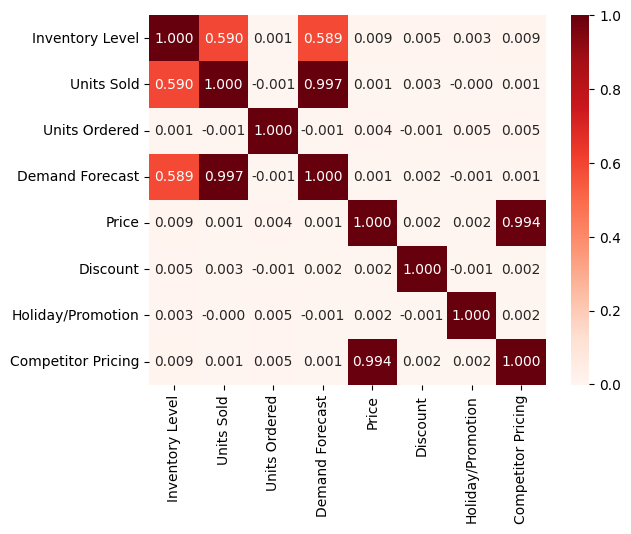

In [7]:
#Visualising the correlation matrix
import seaborn as sns
sns.heatmap(numeric_data.corr(),fmt=".3f", annot=True,cmap='Reds')

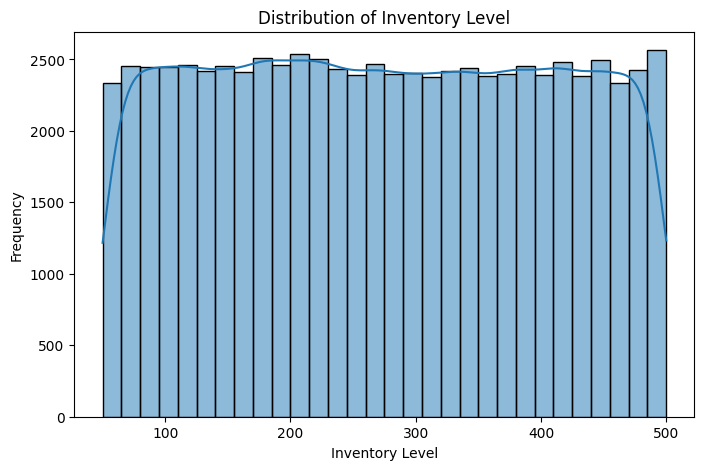

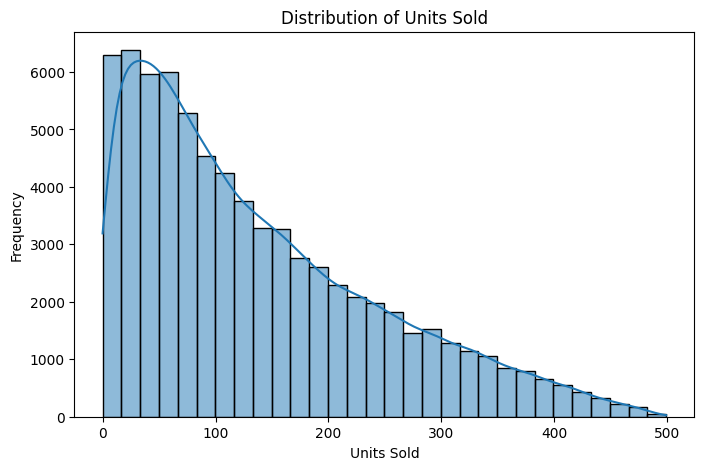

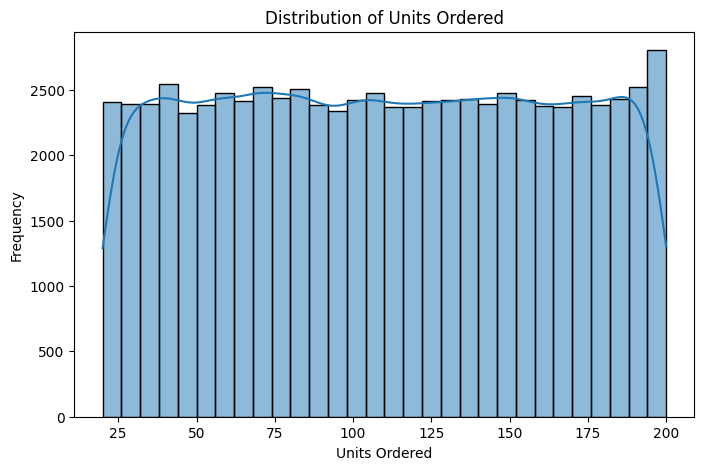

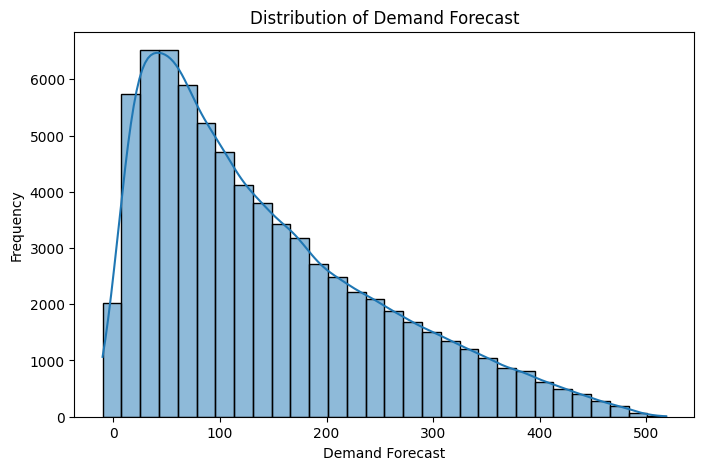

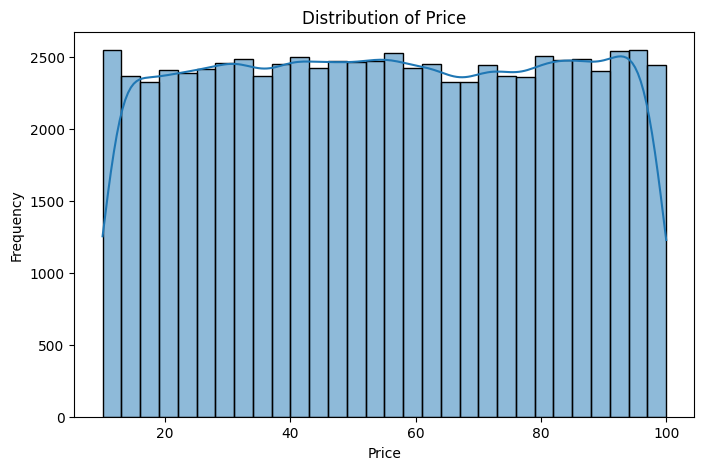

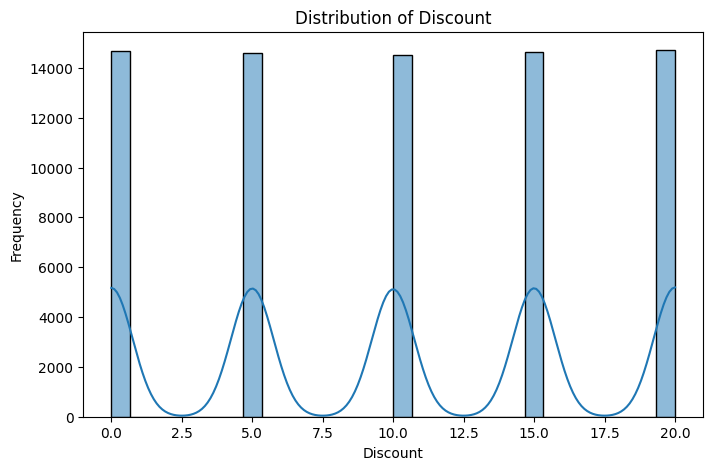

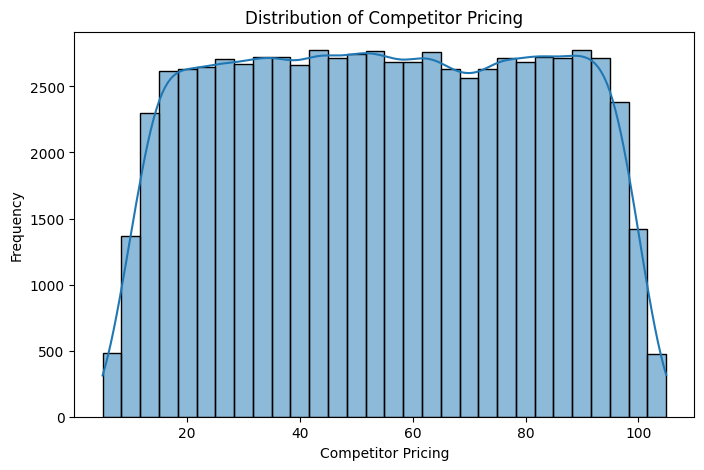

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
# List of numeric columns to plot
numeric_columns = ['Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast', 'Price', 'Discount', 'Competitor Pricing']

# Plot histograms for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[column], bins=30, kde=True)  # kde=True adds a kernel density estimate
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Linear Regression

In [10]:
# Convert categorical variables to dummy variables
data = pd.get_dummies(data, columns=['Category', 'Region', 'Weather Condition', 'Seasonality'], drop_first=True)

# Define features and target variable
X = data.drop(columns=['Date', 'Store ID', 'Product ID', 'Units Sold'])  # Features
y = data['Units Sold']  # Target variable

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#Training the model
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
#Reviewing the model coefficents , which quantify the impact of each independent variable (feature) on the dependent variable (target).
model.coef_

array([ 3.92282656e-03,  6.49482569e-04,  9.91129095e-01, -2.09746351e-03,
        2.01560605e-04,  5.28132645e-02,  4.95191902e-03,  9.99699461e-02,
        6.61257436e-02,  1.23519449e-01,  1.68997089e-02, -1.43661698e-01,
       -2.31250219e-01, -1.72284650e-01, -5.83886562e-02, -4.26544333e-02,
       -4.44016604e-02,  2.49121098e-02, -8.55393032e-02, -8.49531355e-02])

In [24]:
#Making predictions
y_pred = model.predict(X_test)
y_pred

array([134.09748982, 112.4090699 ,  73.43611374, ..., 353.39016193,
       221.93782073, 194.11797959])

In [26]:
#Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f'Mean Squared Error: {mse}')
print(f"Root Mean Square Error: {rmse}")
print(f'R^2 Score: {r2}')

Mean Absolute Error: 7.41788975543773
Mean Squared Error: 73.9727337124646
Root Mean Square Error: 8.600740300256984
R^2 Score: 0.9937521258714742


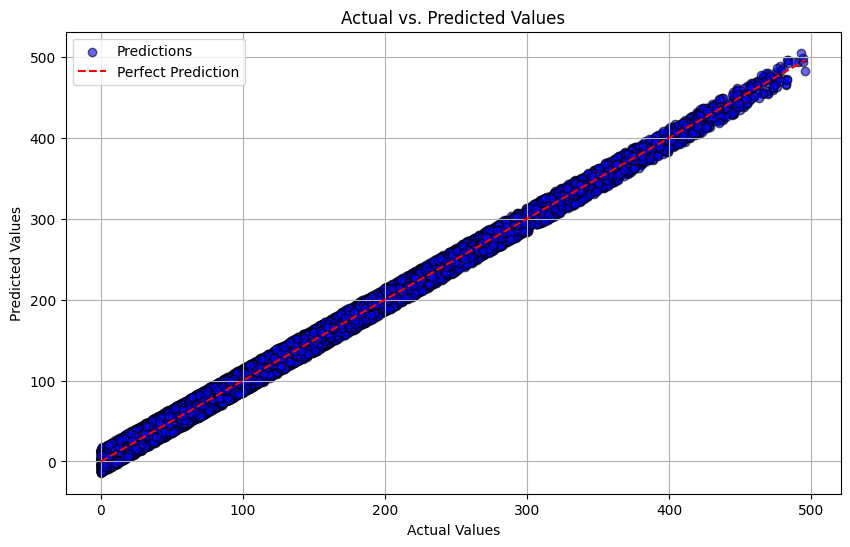

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, c='blue', edgecolors='k', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()
